In [54]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image



# Machine Learning Modelle

In [138]:
# Load the dataset
df = pd.read_csv("data/smoker_train.csv")
df = df.drop_duplicates()

# store test error and train error for each model
# [model, test_mse, train_mse, test_accuracy, train_accuracy, test_f1, train_f1]
model_errors = []
DTC_model_errors = []
RFC_model_errors = []
SVM_model_errors = []

# Split the data into test and train sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

## Naives Modell

In [139]:
# Modell, das immer "Non-Smoker" (0) vorhersagt
y = df_train['smoking']
y_pred_naive = np.zeros_like(y)

# Fehlerwerte berechnen
accuracy = accuracy_score(y, y_pred_naive)
f1 = f1_score(y, y_pred_naive)
mse = mean_squared_error(y, y_pred_naive)

print(f"Accuracy (immer Non-Smoker): {accuracy:.4f}")
print(f"F1-Score (immer Non-Smoker): {f1:.4f}")
print(f"Mean Squared Error (immer Non-Smoker): {mse:.4f}")

# Fehlerwerte für testset berechnen
y_test = df_test['smoking']
y_test_pred_naive = np.zeros_like(y_test)
accuracy_test = accuracy_score(y_test, y_test_pred_naive)
f1_test = f1_score(y_test, y_test_pred_naive)
mse_test = mean_squared_error(y_test, y_test_pred_naive)

print(f"Test Accuracy (immer Non-Smoker): {accuracy_test:.4f}")
print(f"Test F1-Score (immer Non-Smoker): {f1_test:.4f}")
print(f"Test Mean Squared Error (immer Non-Smoker): {mse_test:.4f}")


model_errors.append(['Naive Model', mse_test, mse, accuracy_test, accuracy, f1_test, f1])
DTC_model_errors.append(['Naive Model', mse_test, mse, accuracy_test, accuracy, f1_test, f1])
RFC_model_errors.append(['Naive Model', mse_test, mse, accuracy_test, accuracy, f1_test, f1])
SVM_model_errors.append(['Naive Model', mse_test, mse, accuracy_test, accuracy, f1_test, f1])

Accuracy (immer Non-Smoker): 0.6361
F1-Score (immer Non-Smoker): 0.0000
Mean Squared Error (immer Non-Smoker): 0.3639
Test Accuracy (immer Non-Smoker): 0.6243
Test F1-Score (immer Non-Smoker): 0.0000
Test Mean Squared Error (immer Non-Smoker): 0.3757


## Linear Regression
Not relevant to smoker prediction.

In [ ]:
# Use all columns except 'weight(kg)' and smoking as features
X = df_train[['height(cm)', 'waist(cm)', 'age', 'hemoglobin']]
y = df_train['weight(kg)']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training der Modelle
lr_model = LinearRegression().fit(X_train_1, y_train_1)

y_pred = lr_model.predict(X_test_1)

print(f"Intercept: {lr_model.intercept_}")
for name, coef in zip(X.columns, lr_model.coef_):
    print(f"Coefficient for {name}: {coef}")

mse = mean_squared_error(y_test_1, y_pred)
print(f"Test Mean Squared Error: {mse}")

# Decision Trees

## Decision Tree limited depth of 1

In [110]:

# Input Variablen
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)

# Output Variable
y = df_train['smoking']
y_test = df_test['smoking']

dtc = DecisionTreeClassifier(random_state=0, max_depth=1).fit(X, y)

# Modellanwendung
y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree max depth of 1', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
DTC_model_errors.append(['Decision Tree max depth of 1', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Decision Tree Test Accuracy: 0.6688
Decision Tree Train Accuracy: 0.6630
Decision Tree Test F1-Score: 0.6613
Decision Tree Train F1-Score: 0.6494
Decision Tree Test Mean Squared Error: 0.3312
Decision Tree Train Mean Squared Error: 0.3370


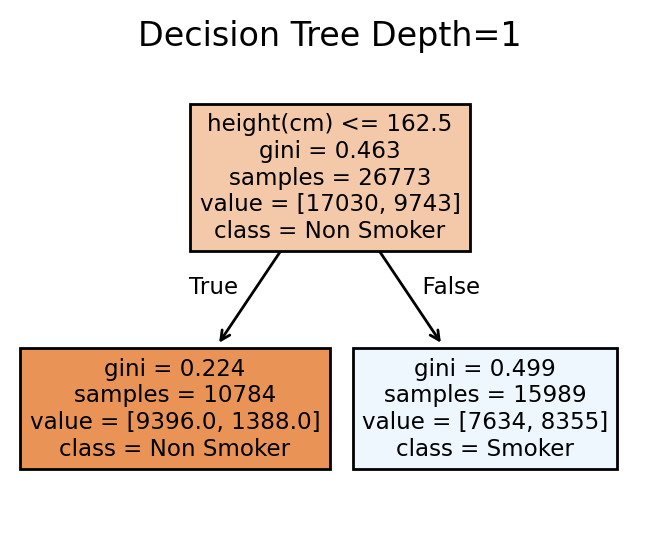

In [ ]:

plt.figure(figsize=(4, 3), dpi=200)
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree Depth=1")
plt.show()

## Decision Tree

In [111]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle
dtc = DecisionTreeClassifier(random_state=0).fit(X, y)

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

# How many leafs does the tree have?
print(f"Number of leafs in the tree: {dtc.get_n_leaves()}")

# How deep is the tree?
print(f"Depth of the tree: {dtc.get_depth()}")

model_errors.append(['Decision Tree', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
DTC_model_errors.append(['Decision Tree', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Decision Tree Test Accuracy: 0.6713
Decision Tree Train Accuracy: 1.0000
Decision Tree Test F1-Score: 0.5637
Decision Tree Train F1-Score: 1.0000
Decision Tree Test Mean Squared Error: 0.3287
Decision Tree Train Mean Squared Error: 0.0000
Number of leafs in the tree: 4239
Depth of the tree: 32


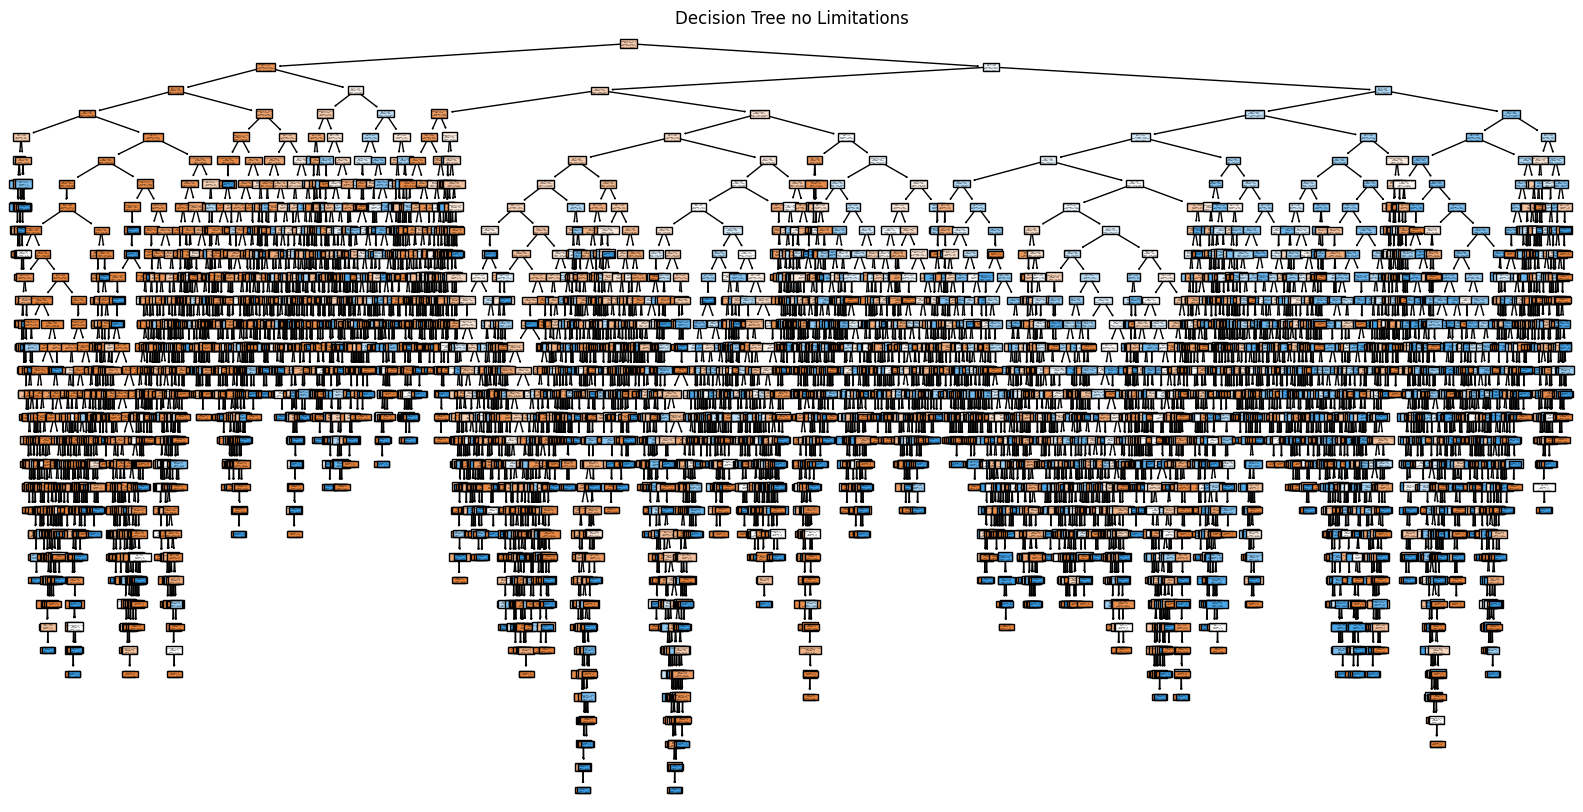

In [100]:
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree no Limitations")
plt.show()

## Decision Tree limited leaves

In [146]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle
dtc = DecisionTreeClassifier(random_state=0, max_leaf_nodes=7).fit(X, y)

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree limited leaves', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
DTC_model_errors.append(['Decision Tree limited leaves', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Decision Tree Test Accuracy: 0.7157
Decision Tree Train Accuracy: 0.7206
Decision Tree Test F1-Score: 0.5915
Decision Tree Train F1-Score: 0.5966
Decision Tree Test Mean Squared Error: 0.2843
Decision Tree Train Mean Squared Error: 0.2794


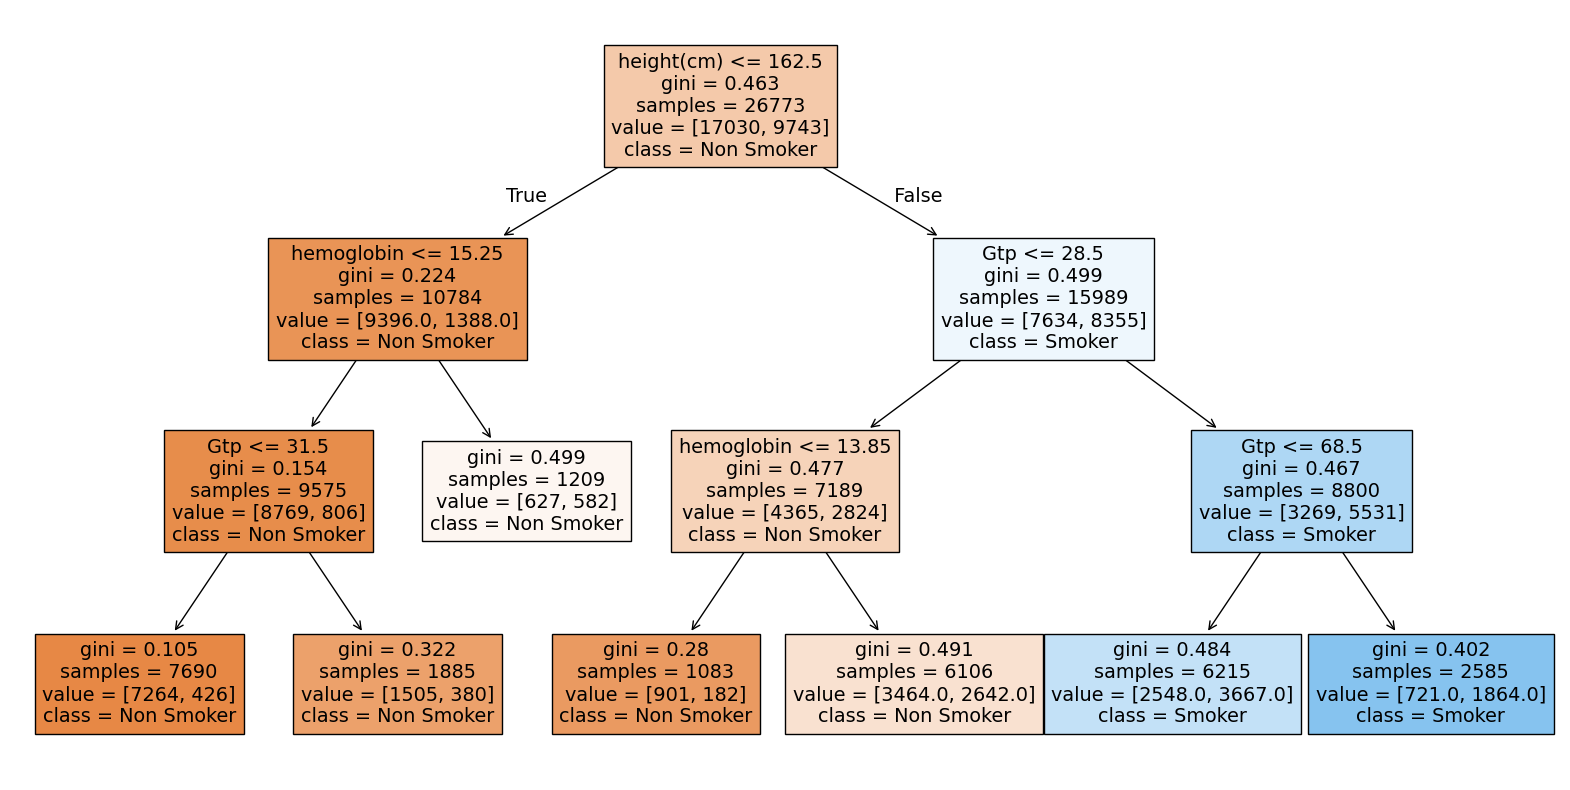

In [147]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.show()

## Decision Tree limited leaves with cross validation for hyperparameter tuning (max leaves)

In [148]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle mit K-Fold Cross-Validation
dtc = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(
    dtc, 
    param_grid={
        'max_leaf_nodes': [2, 5, 8, 9, 10, 11, 12, 17, 20]
    }, 
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Training der Modelle mit den besten Parametern
dtc = grid_search.best_estimator_

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree cv for max leaf', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
DTC_model_errors.append(['Decision Tree cv for max leaf', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_leaf_nodes': 9}
Decision Tree Test Accuracy: 0.7186
Decision Tree Train Accuracy: 0.7250
Decision Tree Test F1-Score: 0.6080
Decision Tree Train F1-Score: 0.6154
Decision Tree Test Mean Squared Error: 0.2814
Decision Tree Train Mean Squared Error: 0.2750


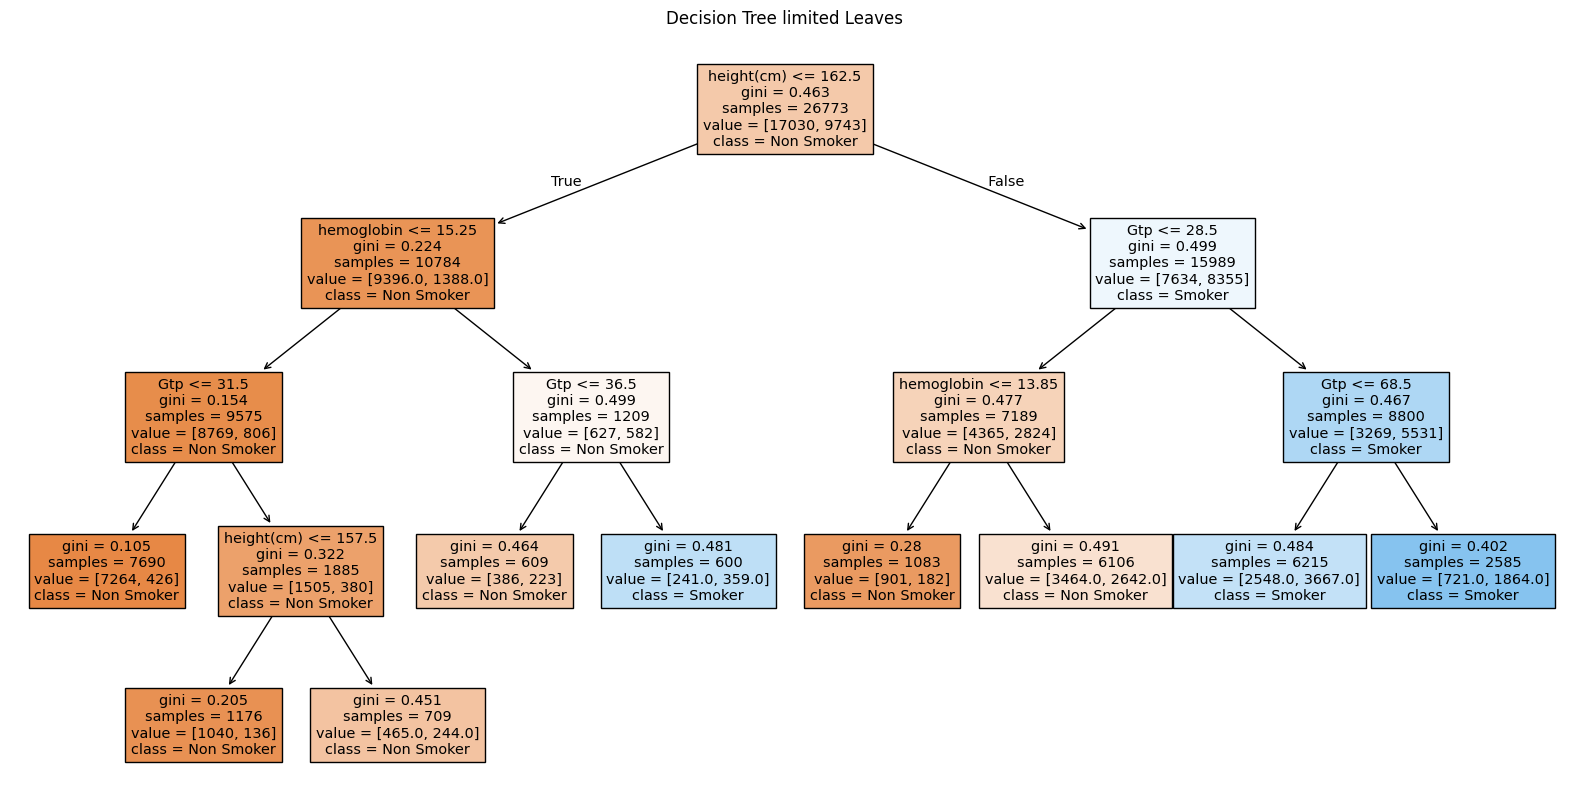

In [149]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree limited Leaves")
plt.show()

## Decision Tree limited leaves with cross validation for hyperparameter tuning (max depth)

In [113]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle mit K-Fold Cross-Validation
dtc = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(
    dtc, 
    param_grid={
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    }, 
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Training der Modelle mit den besten Parametern
dtc = grid_search.best_estimator_

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree cv for max depth', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
DTC_model_errors.append(['Decision Tree cv for max depth', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_depth': 3}
Decision Tree Test Accuracy: 0.7186
Decision Tree Train Accuracy: 0.7250
Decision Tree Test F1-Score: 0.6080
Decision Tree Train F1-Score: 0.6154
Decision Tree Test Mean Squared Error: 0.2814
Decision Tree Train Mean Squared Error: 0.2750


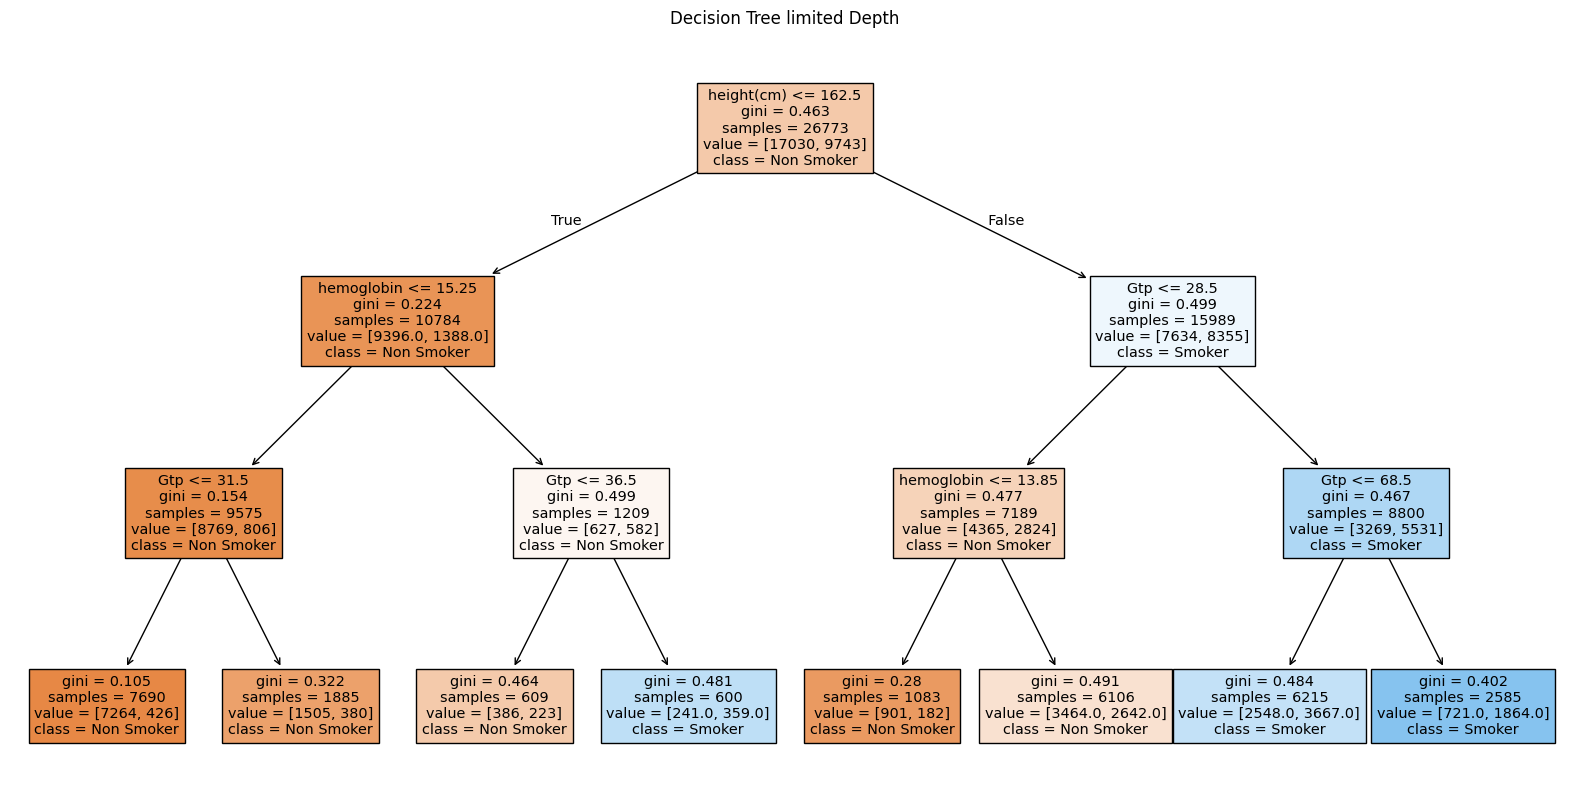

In [107]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree limited Depth")
plt.show()

## Decision Tree limited leaves with cross validation for hyperparameter tuning (ccp_alpha)

In [114]:
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Training der Modelle mit K-Fold Cross-Validation
dtc = DecisionTreeClassifier(random_state=0).fit(X, y)


path = dtc.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

grid_search = GridSearchCV(
    dtc, 
    param_grid={
        'ccp_alpha': ccp_alphas
    }, 
    cv=5,
    scoring='accuracy'
    
)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Training der Modelle mit den besten Parametern
dtc = grid_search.best_estimator_

y_pred_train = dtc.predict(X)
y_pred = dtc.predict(X_test)

# Calc error values
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")
print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test F1-Score: {f1_test:.4f}")
print(f"Decision Tree Train F1-Score: {f1_train:.4f}")
print(f"Decision Tree Test Mean Squared Error: {mse_test:.4f}")
print(f"Decision Tree Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['Decision Tree cv for ccp_alpha', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
DTC_model_errors.append(['Decision Tree cv for ccp_alpha', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'ccp_alpha': np.float64(0.001041334847026995)}
Decision Tree Test Accuracy: 0.7186
Decision Tree Train Accuracy: 0.7250
Decision Tree Test F1-Score: 0.6080
Decision Tree Train F1-Score: 0.6154
Decision Tree Test Mean Squared Error: 0.2814
Decision Tree Train Mean Squared Error: 0.2750


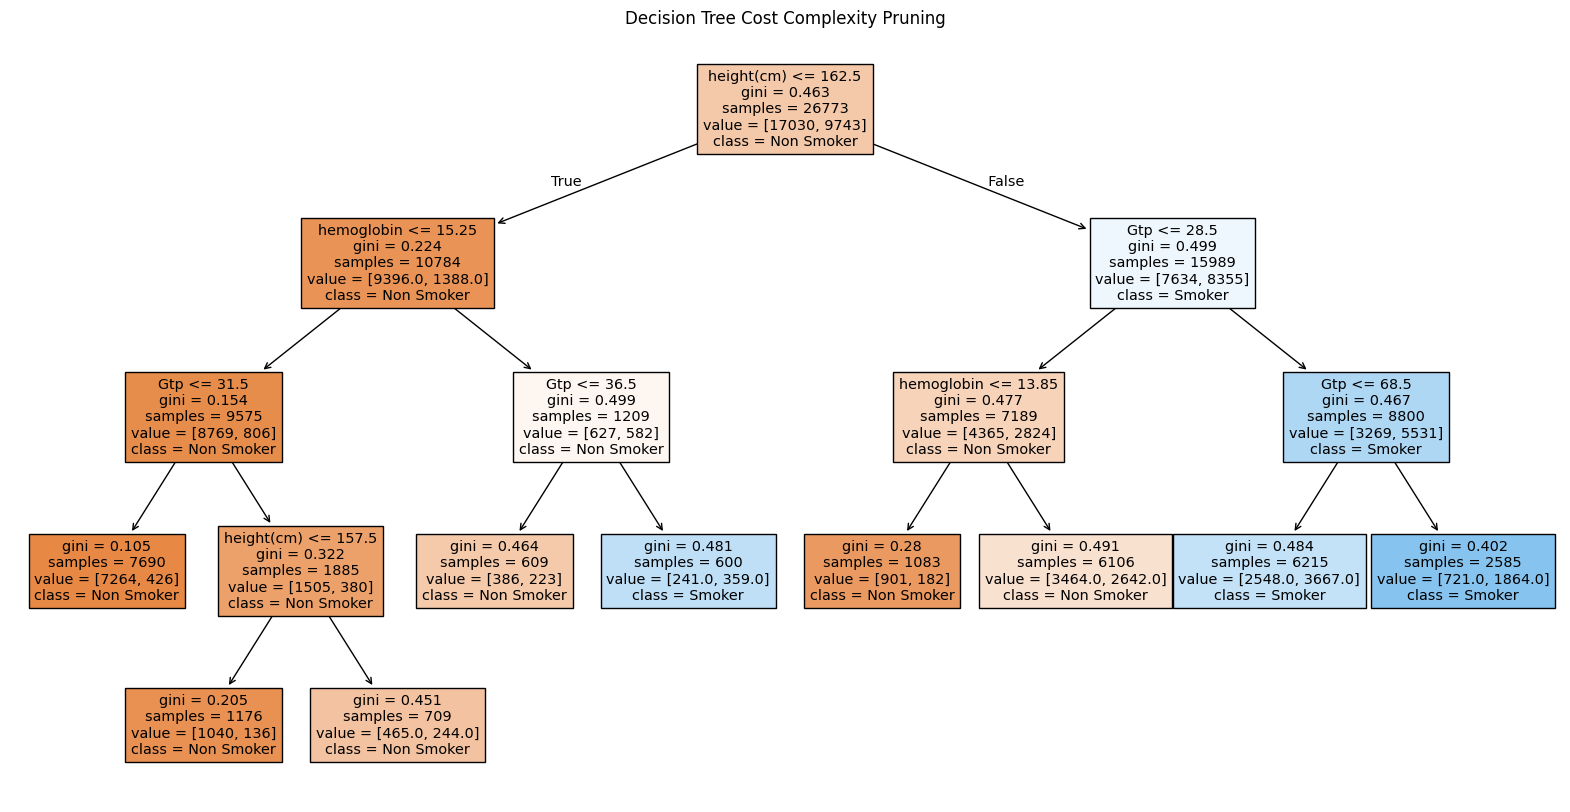

In [115]:
# Entscheidungsbaum des besten Modells visualisieren
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["Non Smoker", "Smoker"])
plt.title("Decision Tree Cost Complexity Pruning")
plt.show()

## Evaluation

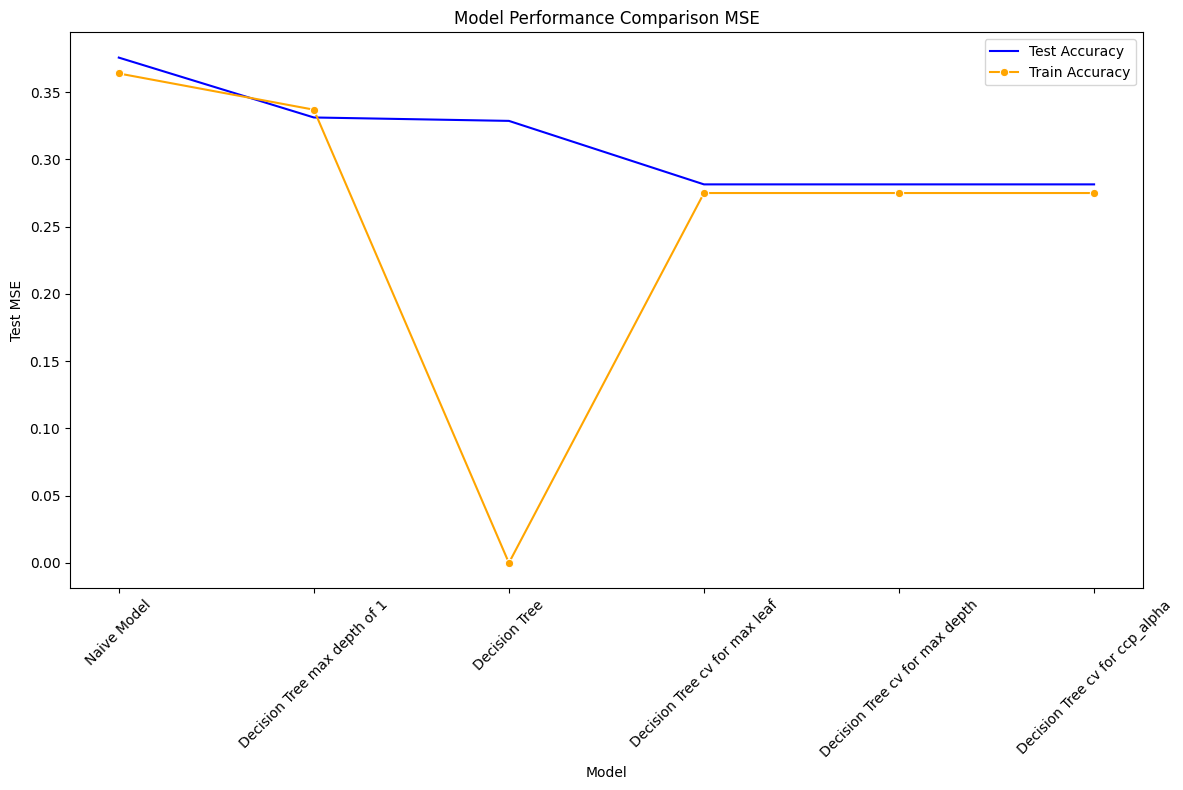

In [116]:
# Visualize model errors
model_errors_df = pd.DataFrame(DTC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test MSE', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train MSE', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison MSE')
plt.legend()
plt.tight_layout()
plt.show()

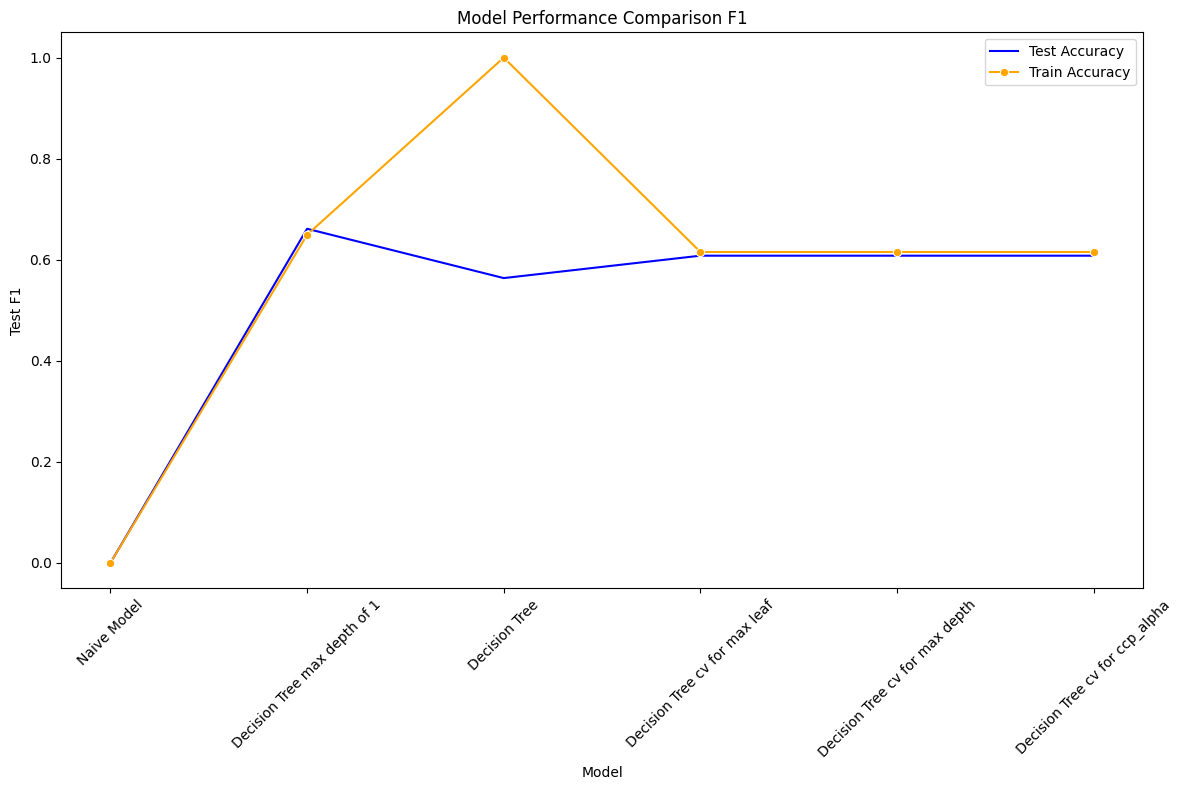

In [117]:
# Visualize model errors
model_errors_df = pd.DataFrame(DTC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison F1')
plt.legend()
plt.tight_layout()
plt.show()

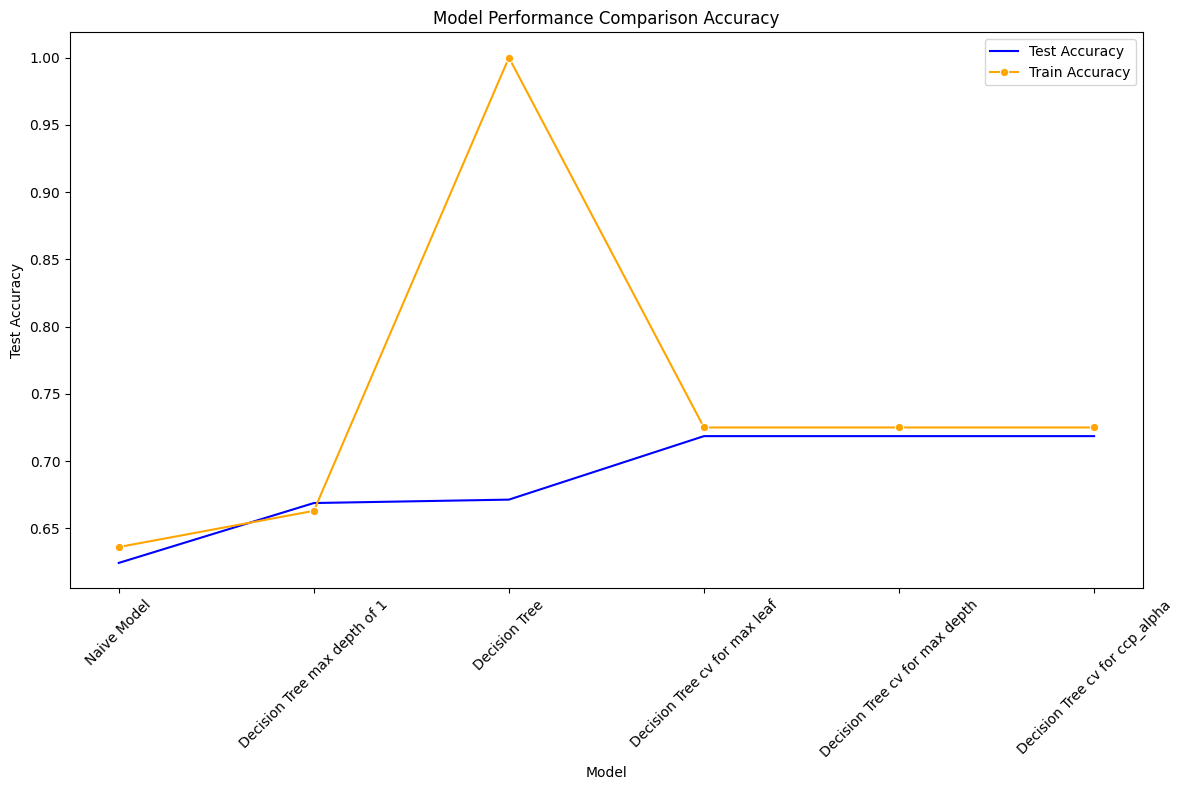

In [118]:
# Visualize model errors
model_errors_df = pd.DataFrame(DTC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

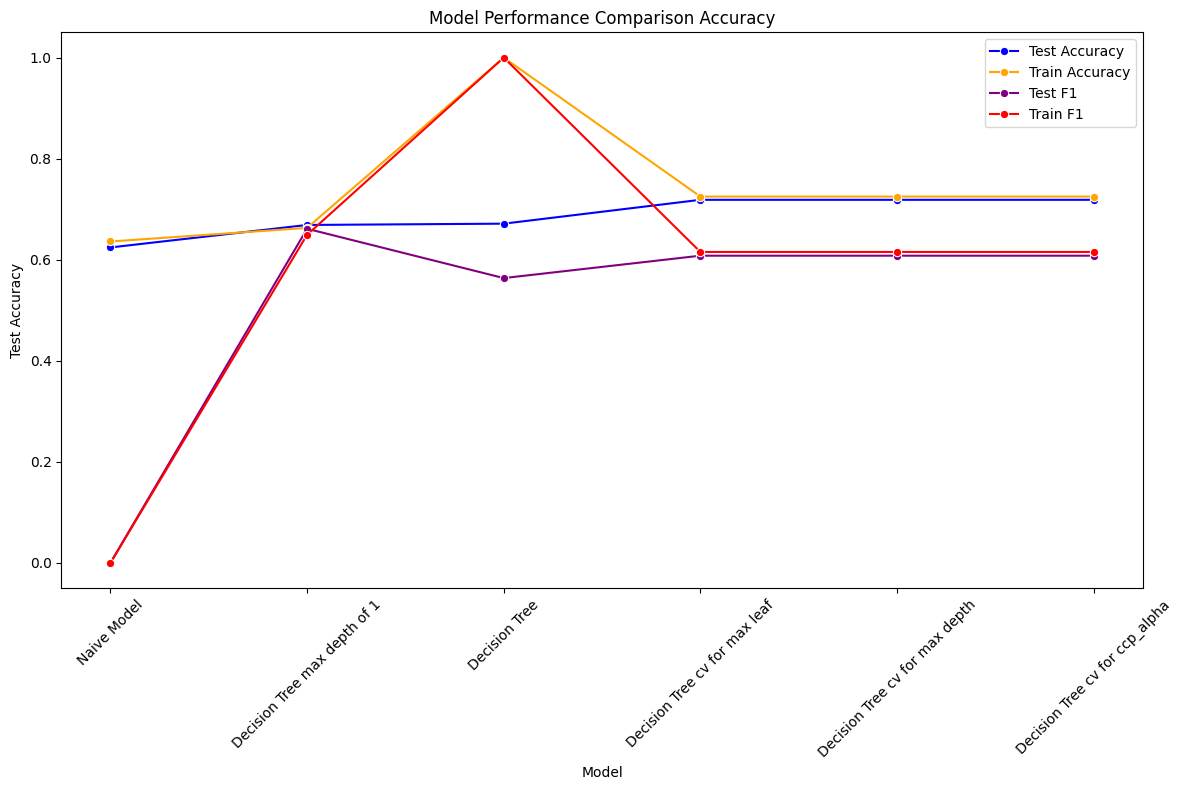

In [119]:
# Visualize model errors
model_errors_df = pd.DataFrame(DTC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy', marker='o')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='purple', label='Test F1', marker='o')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='red', label='Train F1', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Random Forest

## Random forest no tuning

In [140]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell trainieren
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X, y)

# Vorhersagen berechnen
y_pred_train = rfc.predict(X)
y_pred = rfc.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl der genutzten Bäume
print(f"Number of trees in the forest: {len(rfc.estimators_)}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
model_errors.append(['Random Forest', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
RFC_model_errors.append(['Random Forest', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Random Forest Test Accuracy: 0.7369
Random Forest Train Accuracy: 1.0000
Random Forest Test F1-Score: 0.6352
Random Forest Train F1-Score: 1.0000
Random Forest Test Mean Squared Error: 0.2631
Random Forest Train Mean Squared Error: 0.0000
Number of trees in the forest: 100
Average depth of the trees: 33.19


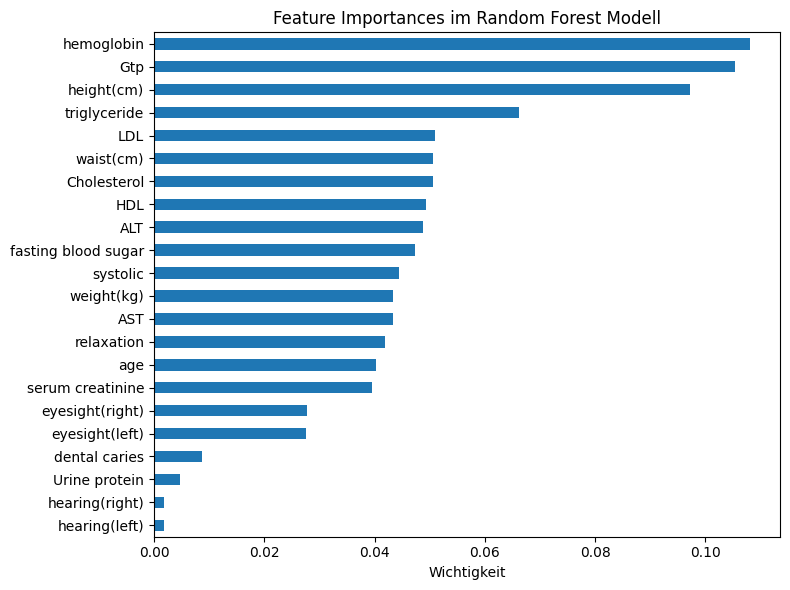

In [123]:
# Feature Importances
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances im Random Forest Modell")
plt.xlabel("Wichtigkeit")
plt.tight_layout()
plt.show()

## Random Forest cross validation hyperparametertuning n_estimators

In [141]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell definieren
rfc = RandomForestClassifier(random_state=0)

# Hyperparameter Grid definieren
param_grid = {
    'n_estimators': [50, 100, 150, 200]
}

# GridSearch mit Cross-Validation
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

# Beste Parameter anzeigen
print("Best parameters found: ", grid_search.best_params_)

# Bestes Modell verwenden
rfc_best = grid_search.best_estimator_

# Vorhersagen berechnen
y_pred_train = rfc_best.predict(X)
y_pred = rfc_best.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl Bäume im besten Modell
print(f"Number of trees in the best model: {rfc_best.n_estimators}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc_best.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
model_errors.append(['Random Forest cv for n_estimators', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
RFC_model_errors.append(['Random Forest cv for n_estimators', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'n_estimators': 200}
Random Forest Test Accuracy: 0.7348
Random Forest Train Accuracy: 1.0000
Random Forest Test F1-Score: 0.6336
Random Forest Train F1-Score: 1.0000
Random Forest Test Mean Squared Error: 0.2652
Random Forest Train Mean Squared Error: 0.0000
Number of trees in the best model: 200
Average depth of the trees: 33.33


## Random Forest cross validation hyperparametertuning max depth

In [142]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell definieren
rfc = RandomForestClassifier(random_state=0, n_estimators=200)

# Hyperparameter Grid definieren
param_grid = {
    'max_depth': [10, 20, 30, 40, 50]
}

# GridSearch mit Cross-Validation
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

# Beste Parameter anzeigen
print("Best parameters found: ", grid_search.best_params_)

# Bestes Modell verwenden
rfc_best = grid_search.best_estimator_

# Vorhersagen berechnen
y_pred_train = rfc_best.predict(X)
y_pred = rfc_best.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl Bäume im besten Modell
print(f"Number of trees in the best model: {rfc_best.n_estimators}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc_best.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
model_errors.append(['Random Forest cv for max_depth', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
RFC_model_errors.append(['Random Forest cv for max_depth', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_depth': 30}
Random Forest Test Accuracy: 0.7377
Random Forest Train Accuracy: 1.0000
Random Forest Test F1-Score: 0.6388
Random Forest Train F1-Score: 1.0000
Random Forest Test Mean Squared Error: 0.2623
Random Forest Train Mean Squared Error: 0.0000
Number of trees in the best model: 200
Average depth of the trees: 29.95


## Random Forest cross validation hyperparametertuning max features

In [143]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell definieren
rfc = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=20)

# Hyperparameter Grid definieren
param_grid = {
    'max_features': ['sqrt', 3, 5, 10]
}

# GridSearch mit Cross-Validation
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

# Beste Parameter anzeigen
print("Best parameters found: ", grid_search.best_params_)

# Bestes Modell verwenden
rfc_best = grid_search.best_estimator_

# Vorhersagen berechnen
y_pred_train = rfc_best.predict(X)
y_pred = rfc_best.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl Bäume im besten Modell
print(f"Number of trees in the best model: {rfc_best.n_estimators}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc_best.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
model_errors.append(['Random Forest cv for max_features', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
RFC_model_errors.append(['Random Forest cv for max_features', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'max_features': 'sqrt'}
Random Forest Test Accuracy: 0.7374
Random Forest Train Accuracy: 0.9973
Random Forest Test F1-Score: 0.6400
Random Forest Train F1-Score: 0.9962
Random Forest Test Mean Squared Error: 0.2626
Random Forest Train Mean Squared Error: 0.0027
Number of trees in the best model: 200
Average depth of the trees: 20.00


## Random Forest cross validation hyperparametertuning min samples leaf

In [144]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# Random Forest Modell definieren
rfc = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=20, max_features='sqrt')


# Parameter Grid für min_samples_leaf
param_grid = {
    'min_samples_leaf': [1, 2, 5, 10, 20, 50]
}

# GridSearchCV Setup
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit Cross-Validation
grid_search.fit(X, y)

# Beste Parameter anzeigen
print("Best parameters found: ", grid_search.best_params_)

# Bestes Modell verwenden
rfc_best = grid_search.best_estimator_

# Vorhersagen berechnen
y_pred_train = rfc_best.predict(X)
y_pred = rfc_best.predict(X_test)

# Metriken berechnen
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

# Ergebnisse ausgeben
print(f"Random Forest Test Accuracy: {accuracy_test:.4f}")
print(f"Random Forest Train Accuracy: {accuracy_train:.4f}")
print(f"Random Forest Test F1-Score: {f1_test:.4f}")
print(f"Random Forest Train F1-Score: {f1_train:.4f}")
print(f"Random Forest Test Mean Squared Error: {mse_test:.4f}")
print(f"Random Forest Train Mean Squared Error: {mse_train:.4f}")

# Anzahl Bäume im besten Modell
print(f"Number of trees in the best model: {rfc_best.n_estimators}")

# Durchschnittliche Tiefe der Bäume ausgeben
tree_depths = [estimator.tree_.max_depth for estimator in rfc_best.estimators_]
avg_depth = sum(tree_depths) / len(tree_depths)
print(f"Average depth of the trees: {avg_depth:.2f}")

# Modellfehlerliste ergänzen
model_errors.append(['Random Forest cv for min_samples_leaf', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
RFC_model_errors.append(['Random Forest cv for min_samples_leaf', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

Best parameters found:  {'min_samples_leaf': 5}
Random Forest Test Accuracy: 0.7396
Random Forest Train Accuracy: 0.9390
Random Forest Test F1-Score: 0.6428
Random Forest Train F1-Score: 0.9149
Random Forest Test Mean Squared Error: 0.2604
Random Forest Train Mean Squared Error: 0.0610
Number of trees in the best model: 200
Average depth of the trees: 20.00


## Evaluation

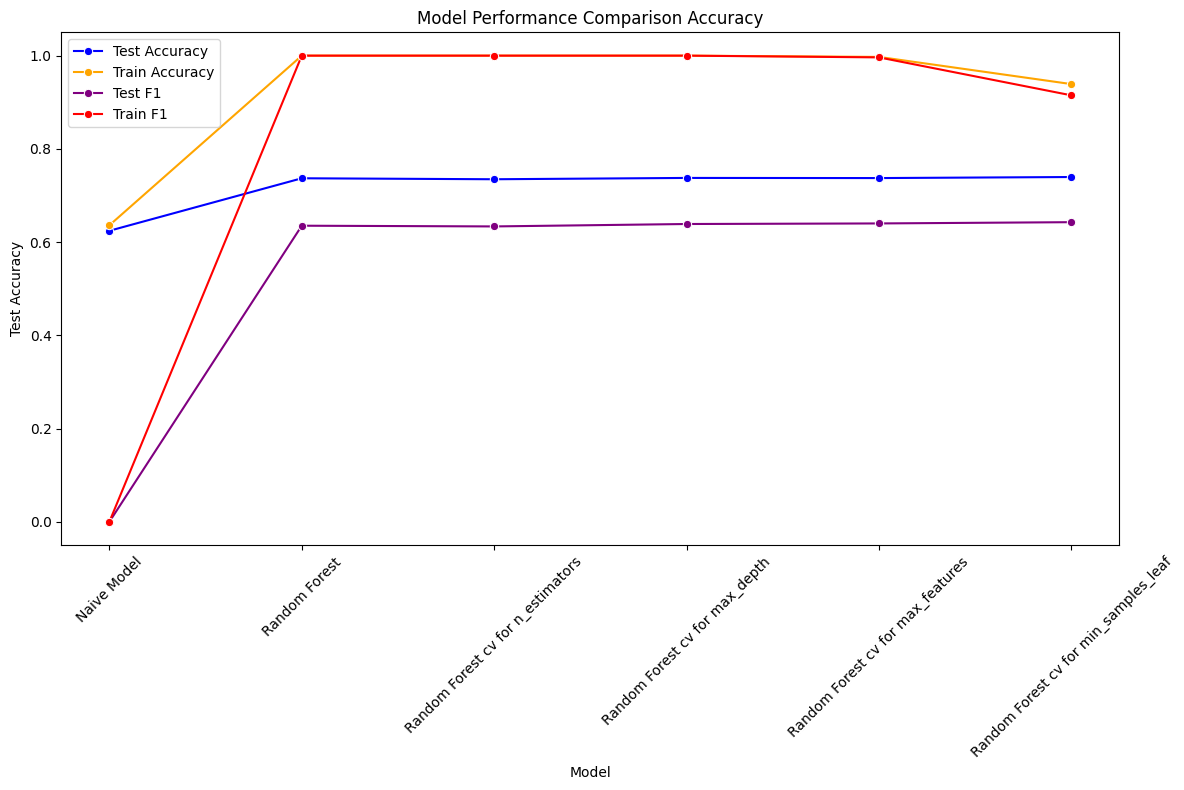

In [145]:
# Visualize model errors
model_errors_df = pd.DataFrame(RFC_model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy', marker='o')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='purple', label='Test F1', marker='o')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='red', label='Train F1', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# SVM

## SVM Modell with cross validation for hyperparameter tuning (C, kernel, gamma)

In [ ]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# SVM-Modell
svm = SVC(random_state=0)

# Grid mit Parametern – einfache Auswahl für Demo-Zwecke
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Cross-Validation mit 5 Folds
grid_search = GridSearchCV(
    svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Modell mit besten Parametern
svm_best = grid_search.best_estimator_

# Vorhersagen
y_pred_train = svm_best.predict(X)
y_pred = svm_best.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

# Fehlerliste ergänzen
model_errors.append(['SVM cv for C/kernel/gamma', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
SVM_model_errors.append(['SVM cv for C/kernel/gamma', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

### Output Parameter tuning
Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Test Accuracy: 0.7269
SVM Train Accuracy: 0.7493
SVM Test F1-Score: 0.6024
SVM Train F1-Score: 0.6291
SVM Test Mean Squared Error: 0.2731
SVM Train Mean Squared Error: 0.2507

## SVM Modell with cross validation for hyperparameter tuning (C)

In [ ]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# SVM-Modell
svm = SVC(random_state=0, gamma='scale', kernel='rbf')

# Grid mit Parametern – einfache Auswahl für Demo-Zwecke
param_grid = {
    'C': [5, 10, 15, 20],
}

# Cross-Validation mit 5 Folds
grid_search = GridSearchCV(
    svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Modell mit besten Parametern
svm_best = grid_search.best_estimator_

# Vorhersagen
y_pred_train = svm_best.predict(X)
y_pred = svm_best.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

# Fehlerliste ergänzen
model_errors.append(['SVM cv for C<20', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
SVM_model_errors.append(['SVM cv for C<20', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])


### Output parameter tuning

Best parameters found:  {'C': 20}
SVM Test Accuracy: 0.7248
SVM Train Accuracy: 0.7519
SVM Test F1-Score: 0.6020
SVM Train F1-Score: 0.6364
SVM Test Mean Squared Error: 0.2752
SVM Train Mean Squared Error: 0.2481

## SVM Modell with cross validation for hyperparameter tuning (C)

In [ ]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']

# SVM-Modell
svm = SVC(random_state=0, gamma='scale', kernel='rbf')

# Grid mit Parametern – einfache Auswahl für Demo-Zwecke
param_grid = {
    'C': [20, 25, 30],
}

# Cross-Validation mit 5 Folds
grid_search = GridSearchCV(
    svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Training mit CV
grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)

# Modell mit besten Parametern
svm_best = grid_search.best_estimator_

# Vorhersagen
y_pred_train = svm_best.predict(X)
y_pred = svm_best.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

# Fehlerliste ergänzen
model_errors.append(['SVM cv for C>20', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
SVM_model_errors.append(['SVM cv for C>20', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

## SVM Modell Hyperparamter tuned with limited Columns

In [ ]:
# Daten vorbereiten
X = df_train[['height(cm)', 'hemoglobin', 'Gtp', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol']]
X_test = df_test[['height(cm)', 'hemoglobin', 'Gtp', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol']]
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = SVC(random_state=42, kernel='rbf', C=10, gamma='scale')
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['SVM cv for limited Columns', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
SVM_model_errors.append(['SVM cv for limited Columns', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])


## SVM Modell

In [ ]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['SVM', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
SVM_model_errors.append(['SVM', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

## SVM Linear Kernel Model

In [ ]:
# Daten vorbereiten
X = df_train.drop('smoking', axis=1)
X_test = df_test.drop('smoking', axis=1)
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = LinearSVC(random_state=42)
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['SVM Linear', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
SVM_model_errors.append(['SVM Linear', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

## SVM Modell limited columns

In [ ]:
# Daten vorbereiten
X = df_train[['height(cm)', 'hemoglobin', 'Gtp']]
X_test = df_test[['height(cm)', 'hemoglobin', 'Gtp']]
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['SVM limited Columns', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
SVM_model_errors.append(['SVM limited Columns', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

## SVM Linear Kernel Modell limited columns

In [ ]:
# Daten vorbereiten
X = df_train[['height(cm)', 'hemoglobin', 'Gtp']]
X_test = df_test[['height(cm)', 'hemoglobin', 'Gtp']]
y = df_train['smoking']
y_test = df_test['smoking']


# Train the SVC model
svc_model = LinearSVC(random_state=42)
svc_model.fit(X, y)

# Make predictions
y_pred_train = svc_model.predict(X)
y_pred = svc_model.predict(X_test)

# Metriken
accuracy_train = accuracy_score(y, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

f1_train = f1_score(y, y_pred_train)
f1_test = f1_score(y_test, y_pred)

mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy_test:.4f}")
print(f"SVM Train Accuracy: {accuracy_train:.4f}")
print(f"SVM Test F1-Score: {f1_test:.4f}")
print(f"SVM Train F1-Score: {f1_train:.4f}")
print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

model_errors.append(['SVM Linear Kernel limited Columns', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])
SVM_model_errors.append(['SVM Linear Kernel limited Columns', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

# Model Evaluation

In [ ]:
# Visualize model errors
model_errors_df = pd.DataFrame(model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test MSE', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train MSE', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Visualize model errors
model_errors_df = pd.DataFrame(model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test F1', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train F1', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Visualize model errors
model_errors_df = pd.DataFrame(model_errors, columns=['Model', 'Test MSE', 'Train MSE', 'Test Accuracy', 'Train Accuracy', 'Test F1', 'Train F1'])
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model', y='Test Accuracy', data=model_errors_df, color='blue', label='Test Accuracy')
sns.lineplot(x='Model', y='Train Accuracy', data=model_errors_df, color='orange', label='Train Accuracy', marker='o')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# Unnecessary

## SVM Model with set C (C=15)

In [ ]:
# # Daten vorbereiten
# X = df_train.drop('smoking', axis=1)
# X_test = df_test.drop('smoking', axis=1)
# y = df_train['smoking']
# y_test = df_test['smoking']


# # Train the SVC model
# svc_model = SVC(random_state=0, kernel='rbf', C=15, gamma='scale')
# svc_model.fit(X, y)

# # Make predictions
# y_pred_train = svc_model.predict(X)
# y_pred = svc_model.predict(X_test)

# # Metriken
# accuracy_train = accuracy_score(y, y_pred_train)
# accuracy_test = accuracy_score(y_test, y_pred)

# f1_train = f1_score(y, y_pred_train)
# f1_test = f1_score(y_test, y_pred)

# mse_train = mean_squared_error(y, y_pred_train)
# mse_test = mean_squared_error(y_test, y_pred)

# print(f"SVM Test Accuracy: {accuracy_test:.4f}")
# print(f"SVM Train Accuracy: {accuracy_train:.4f}")
# print(f"SVM Test F1-Score: {f1_test:.4f}")
# print(f"SVM Train F1-Score: {f1_train:.4f}")
# print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
# print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

# model_errors.append(['SVM', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

## SVM Model with set C (C=8)

In [ ]:
# # Daten vorbereiten
# X = df_train.drop('smoking', axis=1)
# X_test = df_test.drop('smoking', axis=1)
# y = df_train['smoking']
# y_test = df_test['smoking']


# # Train the SVC model
# svc_model = SVC(random_state=0, kernel='rbf', C=8, gamma='scale')
# svc_model.fit(X, y)

# # Make predictions
# y_pred_train = svc_model.predict(X)
# y_pred = svc_model.predict(X_test)

# # Metriken
# accuracy_train = accuracy_score(y, y_pred_train)
# accuracy_test = accuracy_score(y_test, y_pred)

# f1_train = f1_score(y, y_pred_train)
# f1_test = f1_score(y_test, y_pred)

# mse_train = mean_squared_error(y, y_pred_train)
# mse_test = mean_squared_error(y_test, y_pred)

# print(f"SVM Test Accuracy: {accuracy_test:.4f}")
# print(f"SVM Train Accuracy: {accuracy_train:.4f}")
# print(f"SVM Test F1-Score: {f1_test:.4f}")
# print(f"SVM Train F1-Score: {f1_train:.4f}")
# print(f"SVM Test Mean Squared Error: {mse_test:.4f}")
# print(f"SVM Train Mean Squared Error: {mse_train:.4f}")

# model_errors.append(['SVM', mse_test, mse_train, accuracy_test, accuracy_train, f1_test, f1_train])

## SVM Model with too many Parameters

In [ ]:
# # Define features and target variable
# X = df_train.drop('smoking', axis=1)
# y = df_train['smoking']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# svc=SVC() 



# # declare parameters for hyperparameter tuning
# parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
#                {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
#                {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
#               ]




# grid_search = GridSearchCV(estimator = svc,  
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 5,
#                            verbose=0)


# grid_search.fit(X_train, y_train)

# y_pred = grid_search.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# print(f"Genauigkeit des besten Modells auf dem Testdatensatz: {accuracy:.4f}")
# print(f"Genauigkeit des besten Modells auf dem Testdatensatz (f1): {f1:.4f}")

 